In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [60]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [61]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [66]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_8 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 0.8672 - accuracy: 0.5346 - val_loss: 0.6722 - val_accuracy: 0.6002
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6222 - accuracy: 0.6472 - val_loss: 0.5971 - val_accuracy: 0.6852
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5515 - accuracy: 0.7215 - val_loss: 0.5518 - val_accuracy: 0.7212
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4725 - accuracy: 0.7788 - val_loss: 0.4851 - val_accuracy: 0.7660
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4011 - accuracy: 0.8192 - val_loss: 0.5468 - val_accuracy: 0.7106
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3290 - accuracy: 0.8575 - val_loss: 0.3784 - val_accuracy: 0.8372
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2725 - accuracy: 0.8848 - val_loss: 0.4405 - val_ac

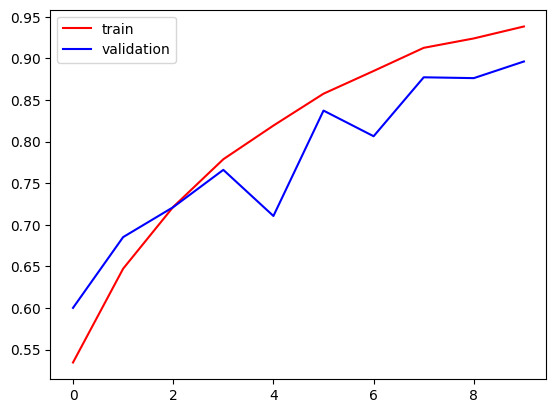

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

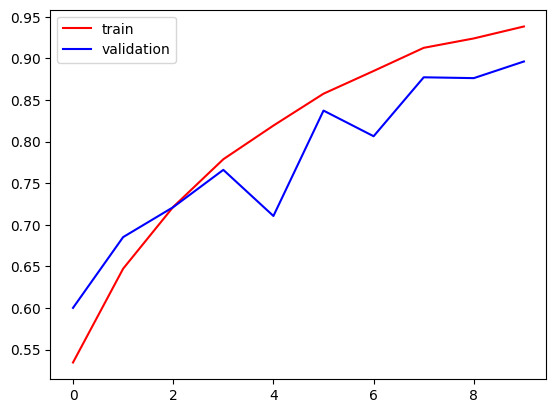

In [71]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

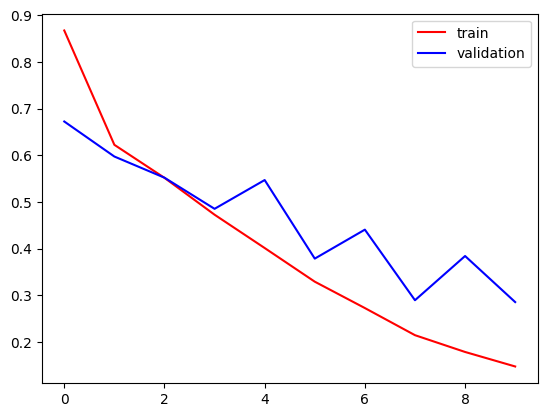

In [72]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

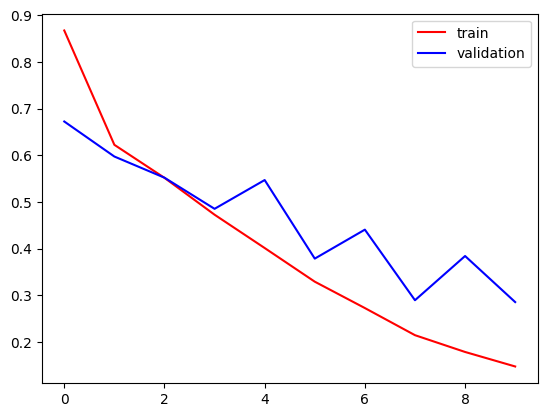

In [73]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [42]:
import cv2

In [82]:
test_img = cv2.imread('/content/dog.png')

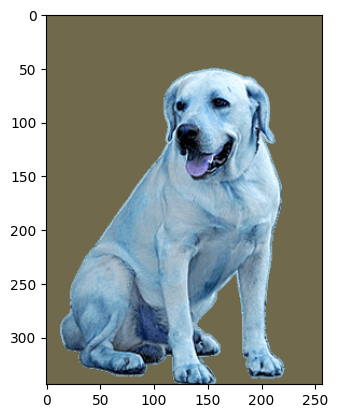

In [83]:
plt.imshow(test_img)

In [84]:
test_img.shape

(344, 257, 3)

In [85]:
test_img = cv2.resize(test_img,(256,256))

In [86]:
test_input = test_img.reshape((1,256,256,3))

In [87]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)